In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
img1=cv2.imread("D:\Python CV_Course\Computer-Vision-with-Python\DATA\dog_backpack.png")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread("D:\Python CV_Course\Computer-Vision-with-Python\DATA\watermark_no_copy.png")
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

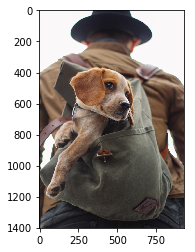

In [3]:
plt.imshow(img1)

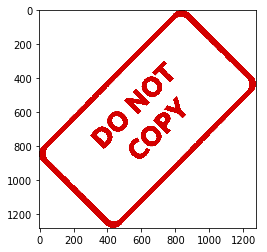

In [4]:
plt.imshow(img2)

In [5]:
img2=cv2.resize(img2,(600,600))

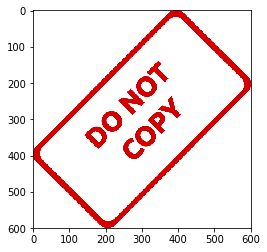

In [6]:
plt.imshow(img2)

In [7]:
img1.shape

(1401, 934, 3)

In [8]:
roi=img1[1401-600:1401,934-600:934]

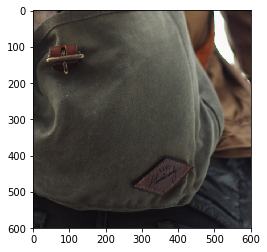

In [10]:
plt.imshow(roi)

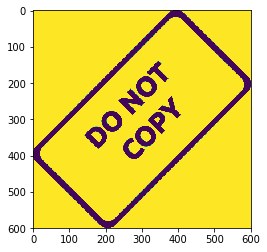

In [11]:
img2gray=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray)

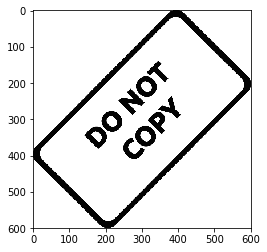

In [12]:
plt.imshow(img2gray,cmap="gray")

In [13]:
inv_img=cv2.bitwise_not(img2gray)

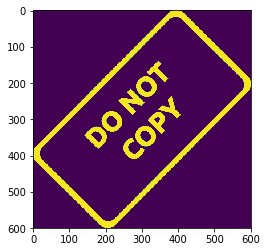

In [14]:
plt.imshow(inv_img)#inverts black as white and white as black as in the image

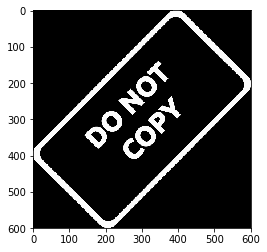

In [15]:
plt.imshow(inv_img,cmap="gray")#plt accepts in BGR form, so converted to gray

In [16]:
inv_img.shape#only has two dimensions,so has to convert that

(600, 600)

In [19]:
white_bkg=np.full(img2.shape,255,dtype=np.uint8)#(white background image)returns a new image with same size and shape as given through img2.shape and fills it with 255 value,ie., we get white image as shown below

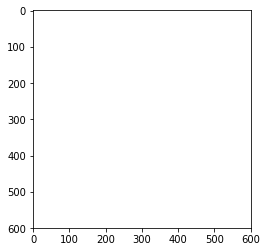

In [20]:
plt.imshow(white_bkg)

In [21]:
white_bkg.shape

(600, 600, 3)

In [23]:
white_bkg#complete 255 value indicating white image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
bk=cv2.bitwise_or(white_bkg,white_bkg,mask=inv_img)

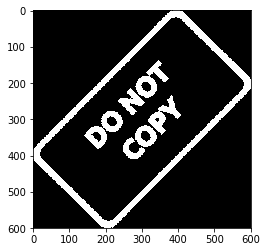

In [25]:
plt.imshow(bk)

In [27]:
bk.shape
#so converted the image to 3 dimensions
#took the image to be masked(here->do not copy image), converted to grayscale
#due to plt accepting different color code, used->cmap="gray"
#invert image from white area to black and vice versa using bitwise_not
#but now the pic only has two dimensions, doesn't have the 3rd channel,the color channels
#to add that np.full is used to produce an image will the specified white(255) fill color
#applied on a new image with size and shape of the small image
#so shape of that image contains 3dimensions
#using bitwise_or white bkg is fused with the do not copy image(it is used since it is more compatible for complex images)
#hence image now has 3 dimensions

(600, 600, 3)

In [28]:
fg=cv2.bitwise_or(img2,img2,mask=inv_img)

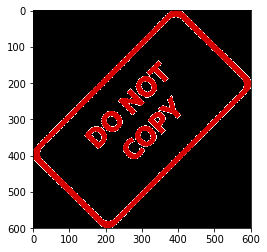

In [32]:
plt.imshow(fg)

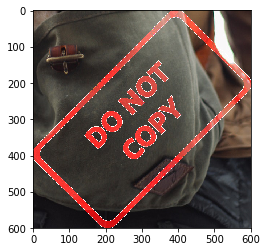

In [34]:
final_roi=cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

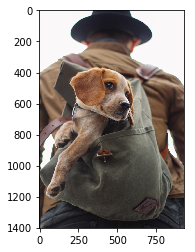

In [35]:
large_img=img1
small_img=final_roi
plt.imshow(img1)

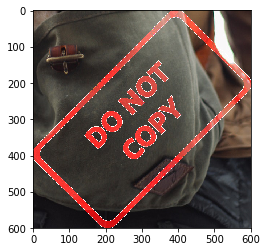

In [36]:
plt.imshow(small_img)

In [37]:
img1.shape

(1401, 934, 3)

In [40]:
large_img[large_img.shape[0]-small_img.shape[0]:large_img.shape[0],large_img.shape[1]-small_img.shape[1]:large_img.shape[1]]=small_img

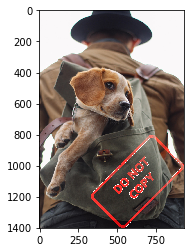

In [41]:
plt.imshow(large_img)